In [1]:
import itertools

import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from rich import print
from tabulate import tabulate

from apps.prod4a_merge_study import BestCut, EventSelection, PFOSelection, SignalBackground, SplitSample, ShowerMergeQuantities
from python.analysis import Master, Plots, vector
plt.style.use('ggplot')

In [2]:
events = Master.Data("work/ROOTFiles/Prod4a_6GeV_BeamSim_00.root", True)#, nEvents=25000)
#events = Master.Data("work/ROOTFiles/Prod4a_6GeV_BeamSim_00_evd.root", True) # if we're lucky we can just look at some events we've already got space points for.

EventSelection(events)
PFOSelection(events)
start_showers, to_merge = SplitSample(events)

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:52: UserWarning: Couldn't apply filters to filters.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:52: UserWarning: Couldn't apply filters to filename.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:52: UserWarning: Couldn't apply filters to _TrueParticleData__pi0_MC.
  warnings.warn(f"Couldn't apply filters to {var}.")


'BeamMCFilter' executed in 11.8941s
number of dalitz decays: 222
'ApplyBeamFilter' executed in 7.6219s


\begin{tabular}{lllll}
\hline
 event selection                   & type        & number of events & percentage of events removed & percentage of 
events remaining \\
 no selection                      & -           & 100222           & -                            &               
\\
 beam -\ensuremath{>} pi0 + X                   & truth       & 27341            & 72.71956257109217            & 
100                            \\
 pi+ beam                          & backtracked & 19949            & 27.036319081233312           & 
72.96368091876668              \\
 diphoton decay                    & truth       & 19727            & 1.1128377362273798           & 
72.15171354376211              \\
 beam particle                     & reco        & 10017            & 49.22187864348355            & 
36.637284664057646             \\
 nPFP \ensuremath{>} 1                          & reco        & 10017            & 0.0                          & 
36.637284664057646             \\
 at least 1 true particle          & backtracked & 10017            & 0.0                          & 
36.637284664057646             \\
 both true photons are backtracked & backtracked & 4356             & 56.51392632524708            & 
15.932116601441052             \\
\hline
\end{tabular}

'EventSelection' executed in 137.1806s


Total number of PFOs: 2645612

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:52: UserWarning: Couldn't apply filters to _RecoParticleData__beam_number.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:52: UserWarning: Couldn't apply filters to _RecoParticleData__beamVertex.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:52: UserWarning: Couldn't apply filters to run.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:52: UserWarning: Couldn't apply filters to subRun.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:52: UserWarning: Couldn't apply filters to eventNum.
  warnings.warn(f"Couldn't apply filters to {var}.")


Total number of PFOs after cut: 2621555

Total number of PFOs: 2621555

Total number of PFOs after cut: 1345045

'PFOSelection' executed in 21.9184s


False

[394, 303, 245, 222, 226, 298, 198, 363, ... 303, 418, 244, 257, 262, 362, 382, 431]

[394, 303, 245, 222, 226, 298, 198, 363, ... 303, 418, 244, 257, 262, 362, 382, 431]

False

False

True

True

True

'SplitSample' executed in 32.7750s


(array([936., 938.,   0., 714., 466.,   0., 397., 222.,   0., 154., 144.,
          0.,  94.,   0.,  63.,  39.,   0.,  35.,  23.,   0.,  19.,  16.,
          0.,   8.,   0.,   9.,   6.,   0.,  10.,   6.,   0.,   3.,   6.,
          0.,   1.,   3.,   0.,   3.,   0.,   3.,   3.,   0.,   1.,   4.,
          0.,   2.,   0.,   0.,   2.,   0.,   2.,   1.,   0.,   0.,   2.,
          0.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,   0.,   1.,   1.,
          0.,   0.,   3.,   0.,   0.,   0.,   0.,   6.,   0.,   0.,   1.,
          0.,   1.,   0.,   0.,   1.,   1.,   0.,   1.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 0.  ,  0.64,  1.28,  1.92,  2.56,  3.2 ,  3.84,  4.48,  5.12,
         5.76,  6.4 ,  7.04,  7.68,  8.32,  8.96,  9.6 , 10.24, 10.88,
        11.52, 12.16, 12.8 , 13.44, 14.08, 14.72, 15.36, 16.  , 16.64,
        17.28, 17.92, 18.56, 19.2 , 19.84, 20.48, 21.12, 21.76, 22.4 ,
        23.04, 23.68, 24.32, 24.96

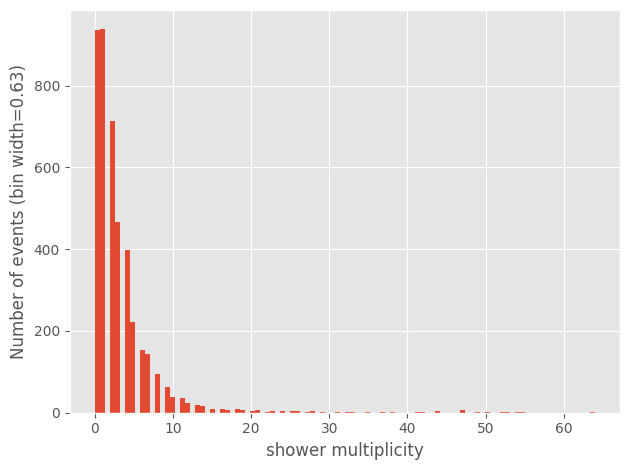

In [8]:
signal, background, signal_all = SignalBackground(events, start_showers, to_merge)
shower_multiplicity = ak.num(signal_all[signal_all])
Plots.PlotHist(shower_multiplicity, xlabel="shower multiplicity")

['beamEvents', 'beamNum', 'reco_beam_startX', 'reco_beam_startY', 'reco_beam_startZ', 'reco_beam_endX', 'reco_beam_endY', 'reco_beam_endZ', 'reco_beam_PFP_true_byHits_startX', 'reco_beam_PFP_true_byHits_startY', 'reco_beam_PFP_true_byHits_startZ', 'reco_beam_PFP_true_byHits_endX', 'reco_beam_PFP_true_byHits_endY', 'reco_beam_PFP_true_byHits_endZ', 'reco_beam_PFP_true_byHits_startE', 'reco_beam_PFP_true_byHits_pdg', 'reco_beam_PFP_true_byHits_mass', 'reco_daughter_allShower_beamCosmicScore']


(['-999', '-1', '0'], [1042997, 8587, 293461])

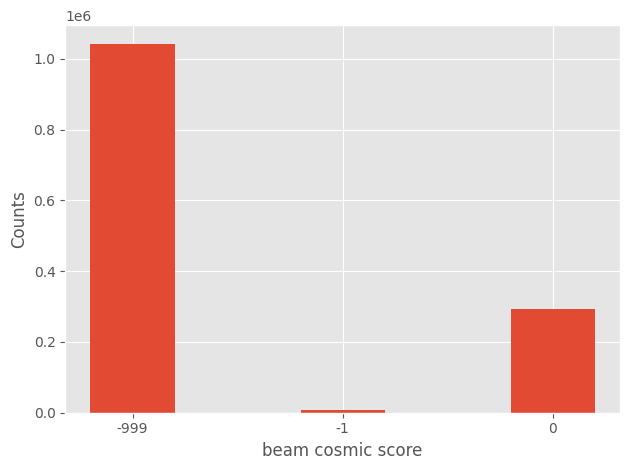

In [9]:
# check if a high shower multiplicty is because the reconstruction method is cosmic
events.io.ListNTuples("beam")
bcScore = events.recoParticles.beamCosmicScore
Plots.PlotBar(ak.ravel(bcScore), xlabel="beam cosmic score")

 - Beam cosmic score of -999 means the PFO didn't have a beam cosmic score value to return (null)
 - -1 indicates a neutrino like PFO, but doesn't equal the beam particle number so other objects are classified as neutrino like
 - 0 means unkown or not neutrino
 - 1 indicates cosmics

In [5]:
table = events.FindEvents(shower_multiplicity > 10)
print(tabulate(table))

-----  --  --------
10135   2  23335379
  380   1  47840754
11450   2  23335379
 2901   2  23335379
 6414   2  23335379
11071   2  23335379
 4721   2  23335379
 5056   2  23335379
 5167   2  23335379
 1475   2  23335379
 9239   2  23335379
 8604   2  23335379
12212   2  23335379
 7545   2  23335379
 1051   2  23335379
 3984   2  23335379
 7574   2  23335379
 3798   2  23335379
 9454   2  23335379
 7648   2  23335379
10829   2  23335379
 2700   2  23335379
 7031   2  23335379
 7443   2  23335379
 4074   5  47840838
 5759   4  23399932
 1295  10  47615372
 1498   5  47840838
  298   7  47840949
 6847   6  47615319
 5435   3  47840763
   55   5  47840838
 7724   4  23399932
 6664   4  23399932
 6585   3  47840763
 3865   4  23399932
11783   3  47840763
  548   7  47840949
11689   4  23399932
 8155   4  23399932
 9435   4  23399932
 1731   6  47615319
 5776   4  23399932
 4035   6  47615319
12071   3  47840763
10637  10  47615372
 8363   1  47840754
 6261  10  47615372
 4146   6  47615319
 4636   6  47615319
 5711   1  47840754
 4552   4  23399932
 2113   1  47840754
 2730   5  47840838
 4216  10  47615372
 3260   4  23399932
 6364   5  47840838
 9515   3  47840763
 2520   4  23399932
 5500   4  23399932
 3725   4  23399932
 5483   6  47615319
 9898   3  47840763
 4648   3  47840763
 1439   4  23399932
 9901   7  47840949
 4882   1  47840754
 5632  10  47615372
12043   3  47840763
 6361  10  47615372
 2416   5  47840838
  433   6  47615319
 2160  10  47615372
 4283   3  47840763
12216   4  23399932
10808   4  23399932
 8279   1  47840754
  914   3  47840763
 3178  10  47615372
 3452   4  23399932
 3485  10  47615372
10484   6  47615319
 8489   7  47840949
10672   7  47840949
 2686   4  23399932
 3005   6  47615319
 4679   5  47840838
 2104   7  47840949
 1124  10  47615372
10301   1  47840754
 3592   1  47840754
 5685   3  47840763
 3996  10  47615372
 2896   4  23399932
12177   4  23399932
 1248   3  47840763
 1538   1  47840754
 6281   7  47840949
 7964  10  47615372
 7367   6  47615319
10545   5  47840838
 2962   3  47840763
 6991   6  47615319
 8877   6  47615319
 8880   6  47615319
 5137   5  47840838
10404   4  23399932
 4877   6  47615319
 6968   1  47840754
10189   6  47615319
 9249   4  23399932
 6325   6  47615319
 7198  10  47615372
 1106   8  47841069
 2966  10  47615372
 7198   4  23399932
 1373   3  47840763
 6953   5  47840838
12241   4  23399932
11160   1  47840754
 5674  10  47615372
 7133   6  47615319
 8835   5  47840838
 2120   3  47840763
 7213   6  47615319
 9049   7  47840949
  138   6  47615319
 5491   5  47840838
11034  10  47615372
  875   9  47841081
  871   1  47840754
 8601   6  47615319
11963   1  47840754
10270   5  47840838
 7408   3  47840763
10255   5  47840838
 9430   7  47840949
11648   6  47615319
11997   5  47840838
 7428   3  47840763
  575   9  47841081
 8809  10  47615372
11219   7  47840949
 6185   6  47615319
 9948  10  47615372
10012   1  47840754
10536   3  47840763
 8643   9  47841081
11428  10  47615372
 8663   9  47841081
 1599   9  47841081
 6349   8  47841069
 9227   8  47841069
10399   5  47840838
  767   9  47841081
 8476   9  47841081
 4314   3  47840763
  582   6  47615319
11450   9  47841081
 8795   8  47841069
 6581   8  47841069
 5092   9  47841081
  262   9  47841081
 6375   9  47841081
10305   8  47841069
 4354   9  47841081
 8918   8  47841069
 6451   8  47841069
 6011   9  47841081
 4872   9  47841081
 5159   9  47841081
 3953   9  47841081
 6116   9  47841081
11999   9  47841081
 2803   9  47841081
11069   9  47841081
10083   9  47841081
12261   6  47615319
11501   7  47840949
 1359   8  47841069
 5422   5  47840838
 1751   8  47841069
 2457   8  47841069
 3688   8  47841069
 1313   9  47841081
 4784   2  23335379
 6280  10  47615372
 1386   5  47840838
 2485   9  47841081
-----  --  --------

(array([[936.,   0.,   0., ...,   0.,   0.,   0.],
        [  0., 938.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   1.]]),
 [array([ 0.  ,  0.62,  1.24,  1.86,  2.48,  3.1 ,  3.72,  4.34,  4.96,
          5.58,  6.2 ,  6.82,  7.44,  8.06,  8.68,  9.3 ,  9.92, 10.54,
         11.16, 11.78, 12.4 , 13.02, 13.64, 14.26, 14.88, 15.5 , 16.12,
         16.74, 17.36, 17.98, 18.6 , 19.22, 19.84, 20.46, 21.08, 21.7 ,
         22.32, 22.94, 23.56, 24.18, 24.8 , 25.42, 26.04, 26.66, 27.28,
         27.9 , 28.52, 29.14, 29.76, 30.38, 31.  , 31.62, 32.24, 32.86,
         33.48, 34.1 , 34.72, 35.34, 35.96, 36.58, 37.2 , 37.82, 38.44,
         39.06, 39.68, 40.3 , 40.92, 41.54, 42.16, 42.78, 43.4 , 44.02,
         44.64, 45.26, 45.88, 46.5 , 47.12, 47.74, 48.36, 48.98, 49.6 ,
         50.22, 50.84, 51.46, 5

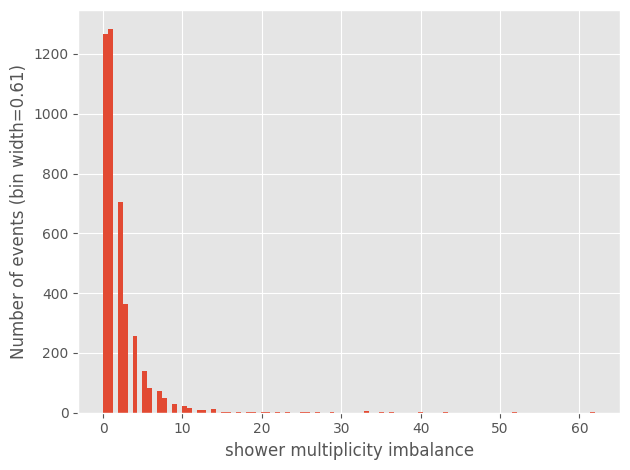

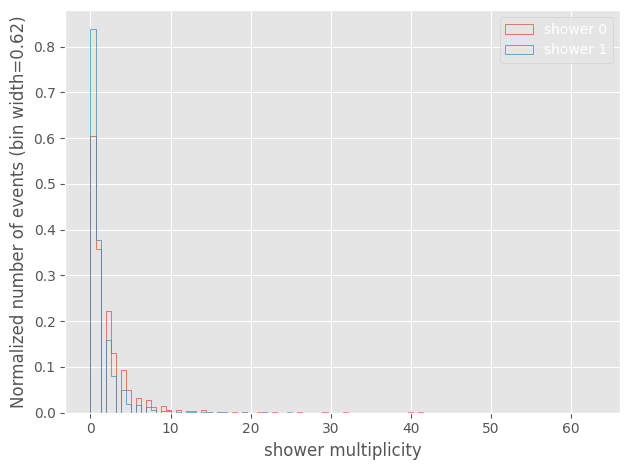

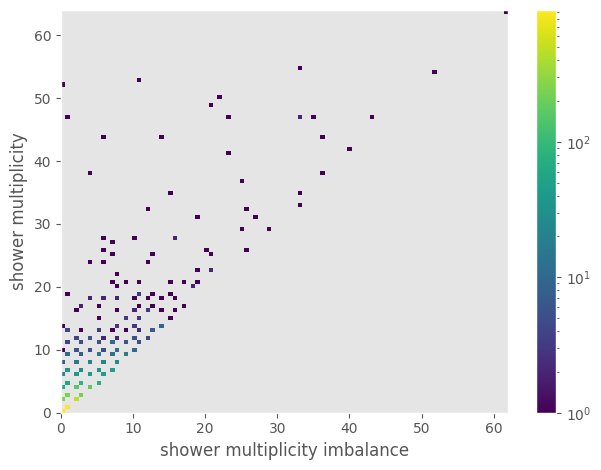

In [10]:
individual_multiplicity = [ak.num(signal[i][signal[i]]) for i in range(2)]
imbalance = abs(individual_multiplicity[0] - individual_multiplicity[1])
Plots.PlotHist(imbalance, xlabel="shower multiplicity imbalance")
Plots.PlotHistComparison(individual_multiplicity, xlabel="shower multiplicity", labels=["shower 0", "shower 1"])


Plots.PlotHist2D(imbalance, shower_multiplicity, bins=100, xlabel="shower multiplicity imbalance", ylabel="shower multiplicity")

## Event Displays

In [19]:
import matplotlib
from python.analysis.EventDisplay import EventDisplay
from notebooks import prod4a_evd

In [3]:
events = Master.Data("work/ROOTFiles/Prod4a_6GeV_BeamSim_00_evd.root", True)

# create hit space point arrays
events.recoParticles.space_points = ak.zip({"x" : events.io.Get("reco_daughter_allShower_spacePointX"), 
                                           "y" : events.io.Get("reco_daughter_allShower_spacePointY"),
                                           "z" : events.io.Get("reco_daughter_allShower_spacePointZ")})
EventSelection(events)
PFOSelection(events)
start_showers, to_merge = SplitSample(events)
signal, background, signal_all = SignalBackground(events, start_showers, to_merge)

# select events which have high start shower multiplicity
multiplicity = ak.ravel(ak.num(signal_all[signal_all]))
f = multiplicity > 10
events.Filter([f], [f])

# need to recalculate start_showers, signal/background etc.
start_showers, to_merge = SplitSample(events)
signal, background, signal_all = SignalBackground(events, start_showers, to_merge)
start_showers_merged = np.logical_or(*start_showers)

nEvents = ak.num(events.recoParticles.space_points.x, 0)
print(f"number of events: {nEvents}")

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:52: UserWarning: Couldn't apply filters to filters.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:52: UserWarning: Couldn't apply filters to filename.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:52: UserWarning: Couldn't apply filters to _TrueParticleData__pi0_MC.
  warnings.warn(f"Couldn't apply filters to {var}.")


'BeamMCFilter' executed in 0.3148s
number of dalitz decays: 1
'ApplyBeamFilter' executed in 0.2549s


\begin{tabular}{lllll}
\hline
 event selection                   & type        & number of events & percentage of events removed & percentage of 
events remaining \\
 no selection                      & -           & 749              & -                            &               
\\
 beam -\ensuremath{>} pi0 + X                   & truth       & 260              & 65.28704939919893            & 
100                            \\
 pi+ beam                          & backtracked & 208              & 20.0                         & 80.0          
\\
 diphoton decay                    & truth       & 207              & 0.4807692307692308           & 
79.61538461538461              \\
 beam particle                     & reco        & 128              & 38.16425120772947            & 
49.23076923076923              \\
 nPFP \ensuremath{>} 1                          & reco        & 128              & 0.0                          & 
49.23076923076923              \\
 at least 1 true particle          & backtracked & 128              & 0.0                          & 
49.23076923076923              \\
 both true photons are backtracked & backtracked & 87               & 32.03125                     & 
33.46153846153847              \\
\hline
\end{tabular}

'EventSelection' executed in 2.6964s


Total number of PFOs: 50929

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:52: UserWarning: Couldn't apply filters to _RecoParticleData__beam_number.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:52: UserWarning: Couldn't apply filters to _RecoParticleData__beamVertex.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:52: UserWarning: Couldn't apply filters to run.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:52: UserWarning: Couldn't apply filters to subRun.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:52: UserWarning: Couldn't apply filters to eventNum.
  warnings.warn(f"Couldn't apply filters to {var}.")


Total number of PFOs after cut: 50473

Total number of PFOs: 50473

Total number of PFOs after cut: 26116

'PFOSelection' executed in 0.5613s


False

[303, 356, 434, 275, 186, 249, 207, 264, ... 399, 327, 264, 326, 389, 302, 304, 351]

[303, 356, 434, 275, 186, 249, 207, 264, ... 399, 327, 264, 326, 389, 302, 304, 351]

False

False

True

True

True

'SplitSample' executed in 0.8484s


False

[333, 268, 359, 271, 274, 190, 190, 327]

[333, 268, 359, 271, 274, 190, 190, 327]

False

False

True

True

True

'SplitSample' executed in 0.0918s


number of events: 8

In [28]:
def MakeEvd(eventNum : int, xlim : tuple = None, ylim : tuple = None, zlim : tuple = None):
    plt.style.use('dark_background')
    plt.rcParams.update({'font.size': 10})
    display = prod4a_evd.EventDisplay(events.eventNum[eventNum], events.run[eventNum], events.subRun[eventNum], True, False)
    # display.xy.set_facecolor("whitesmoke")
    # display.xz.set_facecolor("whitesmoke")
    display.xy.grid()
    display.xz.grid()

    points = events.recoParticles.space_points[start_showers_merged][eventNum]
    startPoints = events.recoParticles.shower_start_pos[start_showers_merged][eventNum]
    directions = events.recoParticles.shower_direction[start_showers_merged][eventNum]
    pdgs = events.trueParticlesBT.pdg[start_showers_merged][eventNum]
    display.PFO(points[0], marker = "x", colour = "green", startPoint = startPoints[0], direction = directions[0]) #, pdg = pdgs[0])
    display.PFO(points[1], marker = "x", colour = "blue", startPoint = startPoints[1], direction = directions[1]) #, pdg = pdgs[1])

    points = events.recoParticles.space_points[to_merge][eventNum]
    startPoints = events.reshower_start_posles.startPos[to_merge][eventNum]
    directions = events.recoParticles.shower_direction[to_merge][eventNum]
    pdgs = events.trueParticlesBT.pdg[to_merge][eventNum]
    beam_mask = np.logical_not(events.recoParticles.number == events.recoParticles.beam_number)[to_merge]

    #* Plot signal PFOs
    prod4a_evd.PlotSignalPFO(display, eventNum, signal, points, startPoints, directions, None, 0, -1, False)
    prod4a_evd.PlotSignalPFO(display, eventNum, signal, points, startPoints, directions, None, 1, -1, False)

    #* Plot background PFOs
    prod4a_evd.PlotBackgroundPFO(display, eventNum, background, beam_mask, points, startPoints, directions, pdg = None, i = -1, plotIP = False)

    #* Plot beam particle:
    beam_mask = events.recoParticles.number == events.recoParticles.beam_number
    points = events.recoParticles.space_points[beam_mask][eventNum]
    pdg = events.trueParticlesBT.pdg[beam_mask][eventNum]
    display.PFO(points, marker="o", colour="magenta", startPoint = events.recoParticles.beamVertex[eventNum])

    #* Plot beam vertex
    display.Point(events.recoParticles.beamVertex[eventNum], marker="x", colour="red", pointSize=100)

    custom_lines = [matplotlib.lines.Line2D([0], [0], color="magenta", lw=2),
                    matplotlib.lines.Line2D([0], [0], color="green", lw=2),
                    matplotlib.lines.Line2D([0], [0], color="lime", lw=2),
                    matplotlib.lines.Line2D([0], [0], color="blue", lw=2),
                    matplotlib.lines.Line2D([0], [0], color="cyan", lw=2),
                    matplotlib.lines.Line2D([0], [0], color="orange", lw=2),
                    matplotlib.lines.Line2D([0], [0], marker="x", color="red", markersize=15, lw=0),
                    ]

    display.xy.legend(custom_lines, ["beam particle", "start shower 1", "signal 1", "start shower 2", "signal 2", "background", "decay vertex"])
    plt.tight_layout()

    if xlim == None:
        xlim = display.xlim
    if ylim == None:
        ylim = display.ylim
    if zlim == None:
        zlim = display.zlim

    display.DetectorBounds(xlim, ylim, zlim)

    display.fig2D.set_size_inches(6.4*3, 4.8*3)
    display.fig2D.set_dpi(500)


Number of signal PFOs for start shower 0: 20
Number of signal PFOs for start shower 1: 1


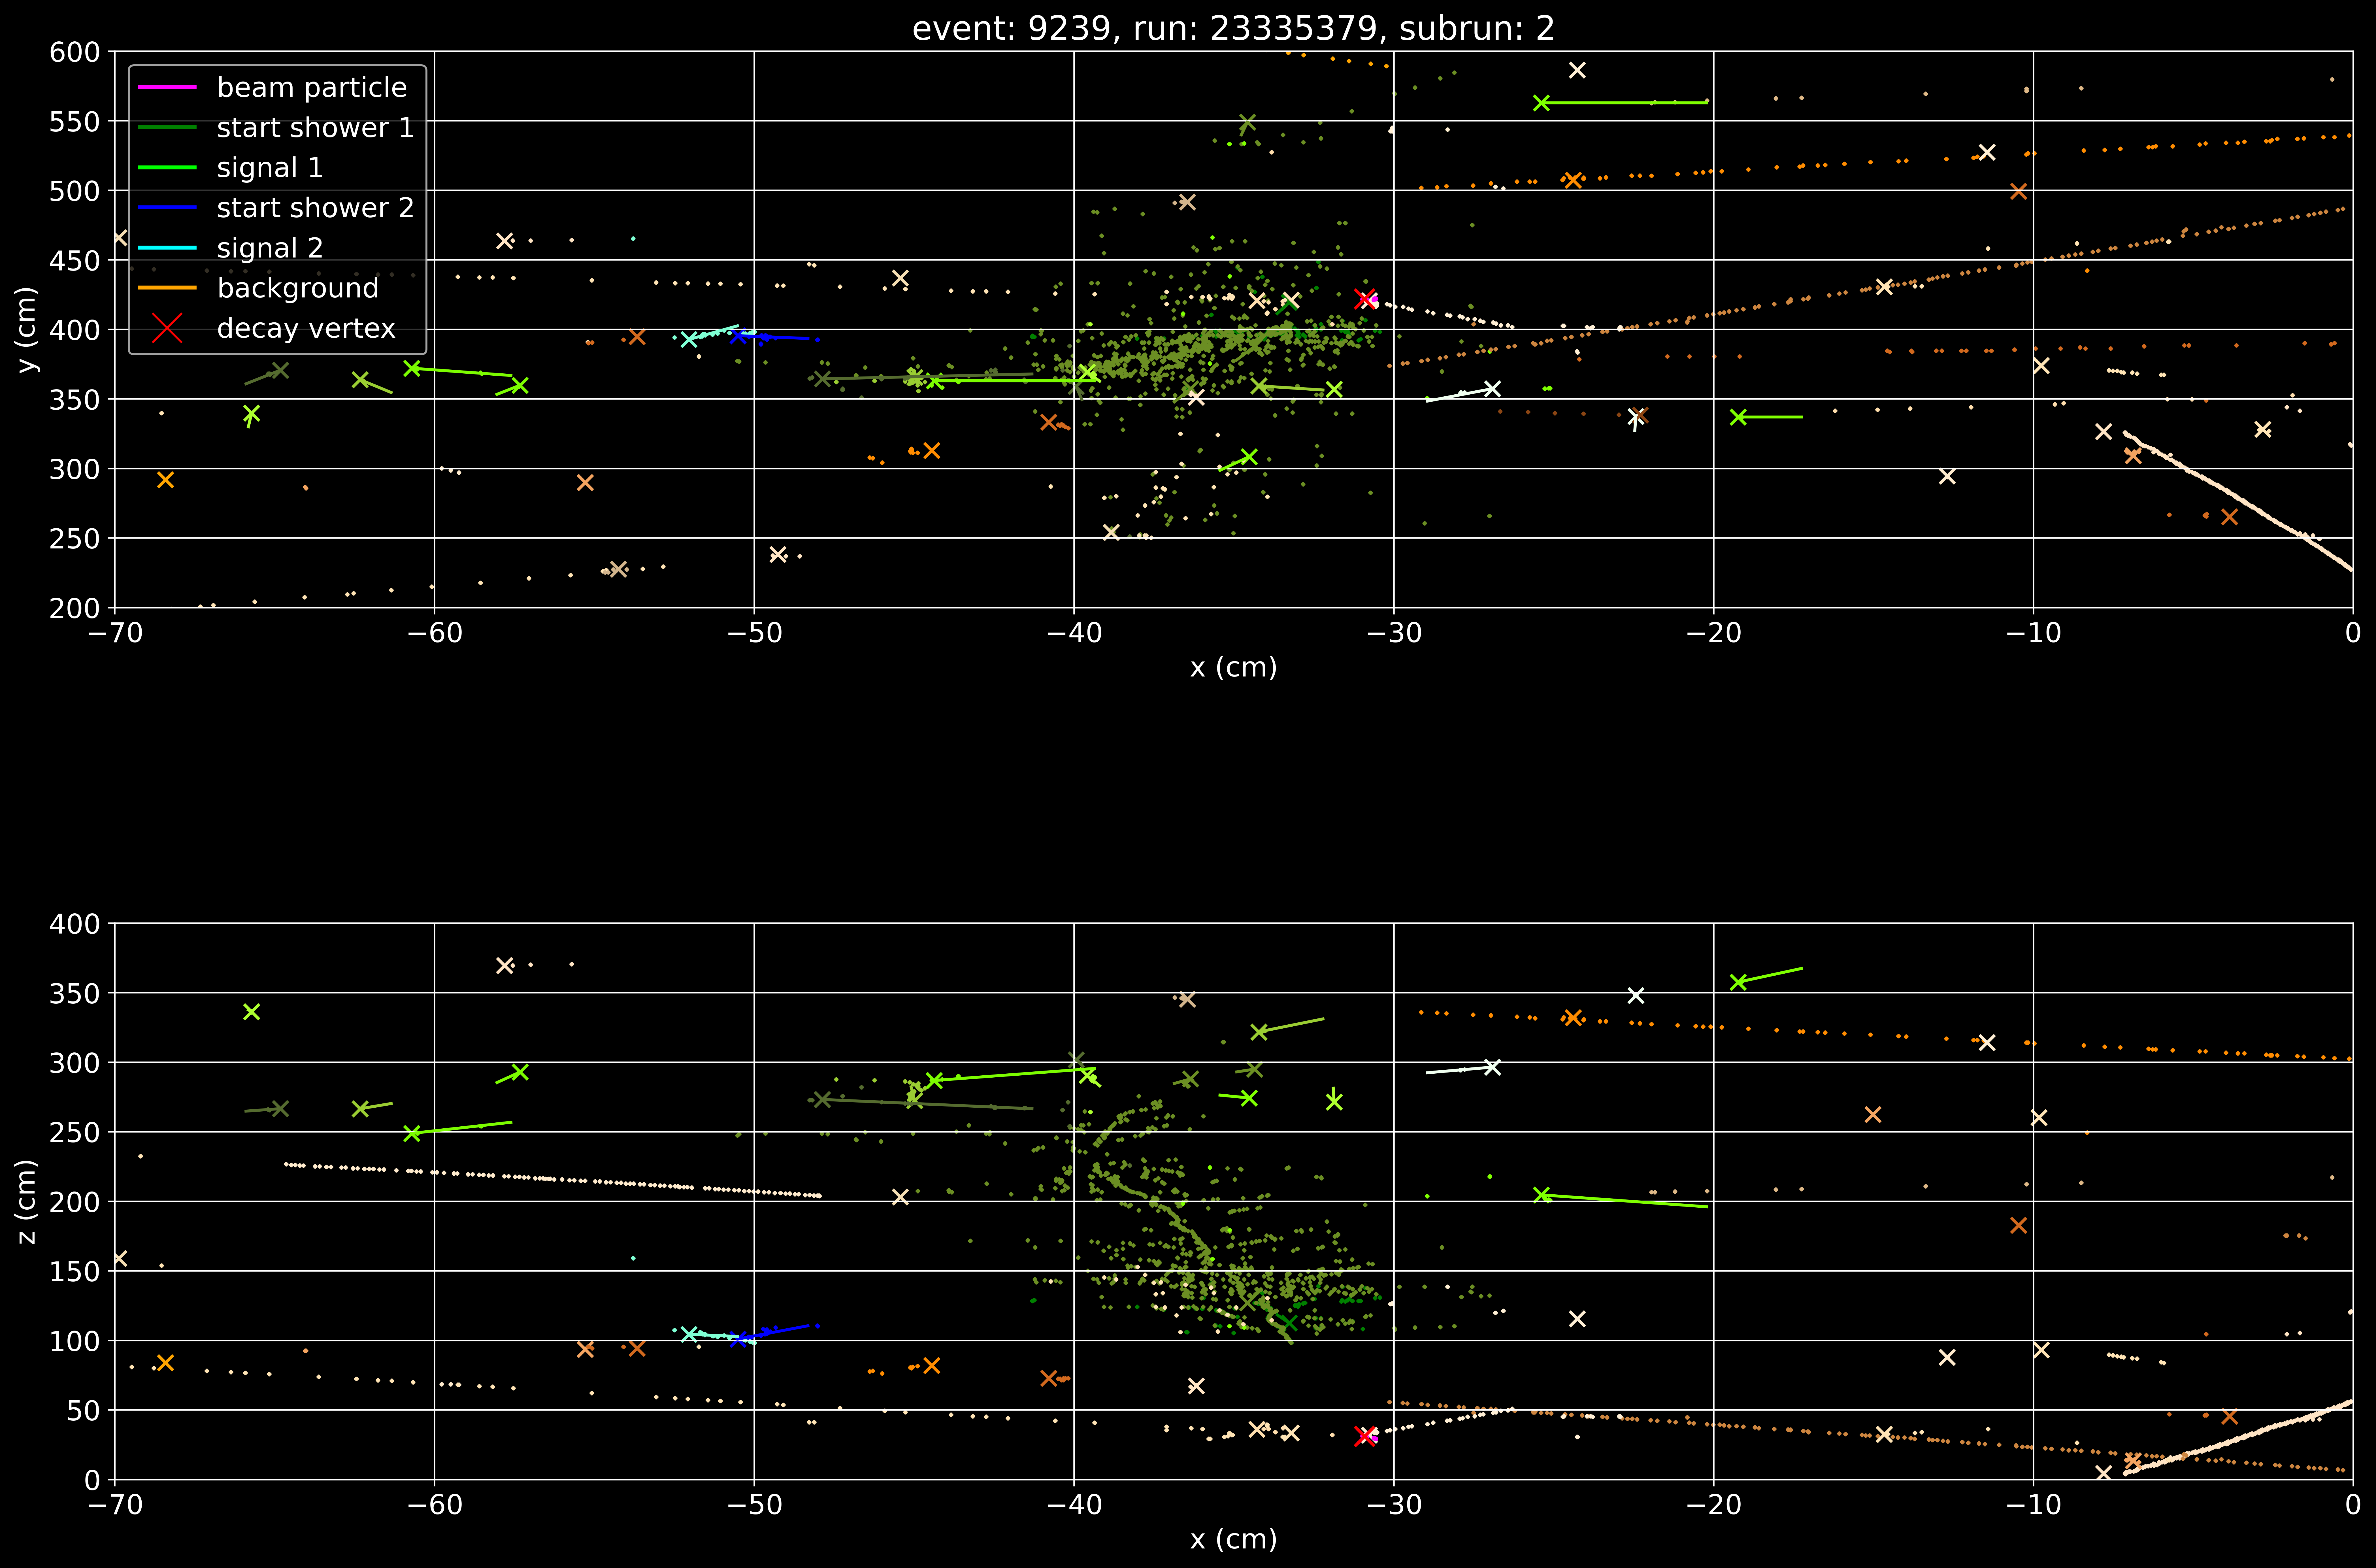

In [34]:
MakeEvd(3, (-70, 0), (200, 600), (0, 400))

Large shower breaks up into smaller fragments at the end of the shower. Start shower was not the leading shower

Number of signal PFOs for start shower 0: 5
Number of signal PFOs for start shower 1: 7


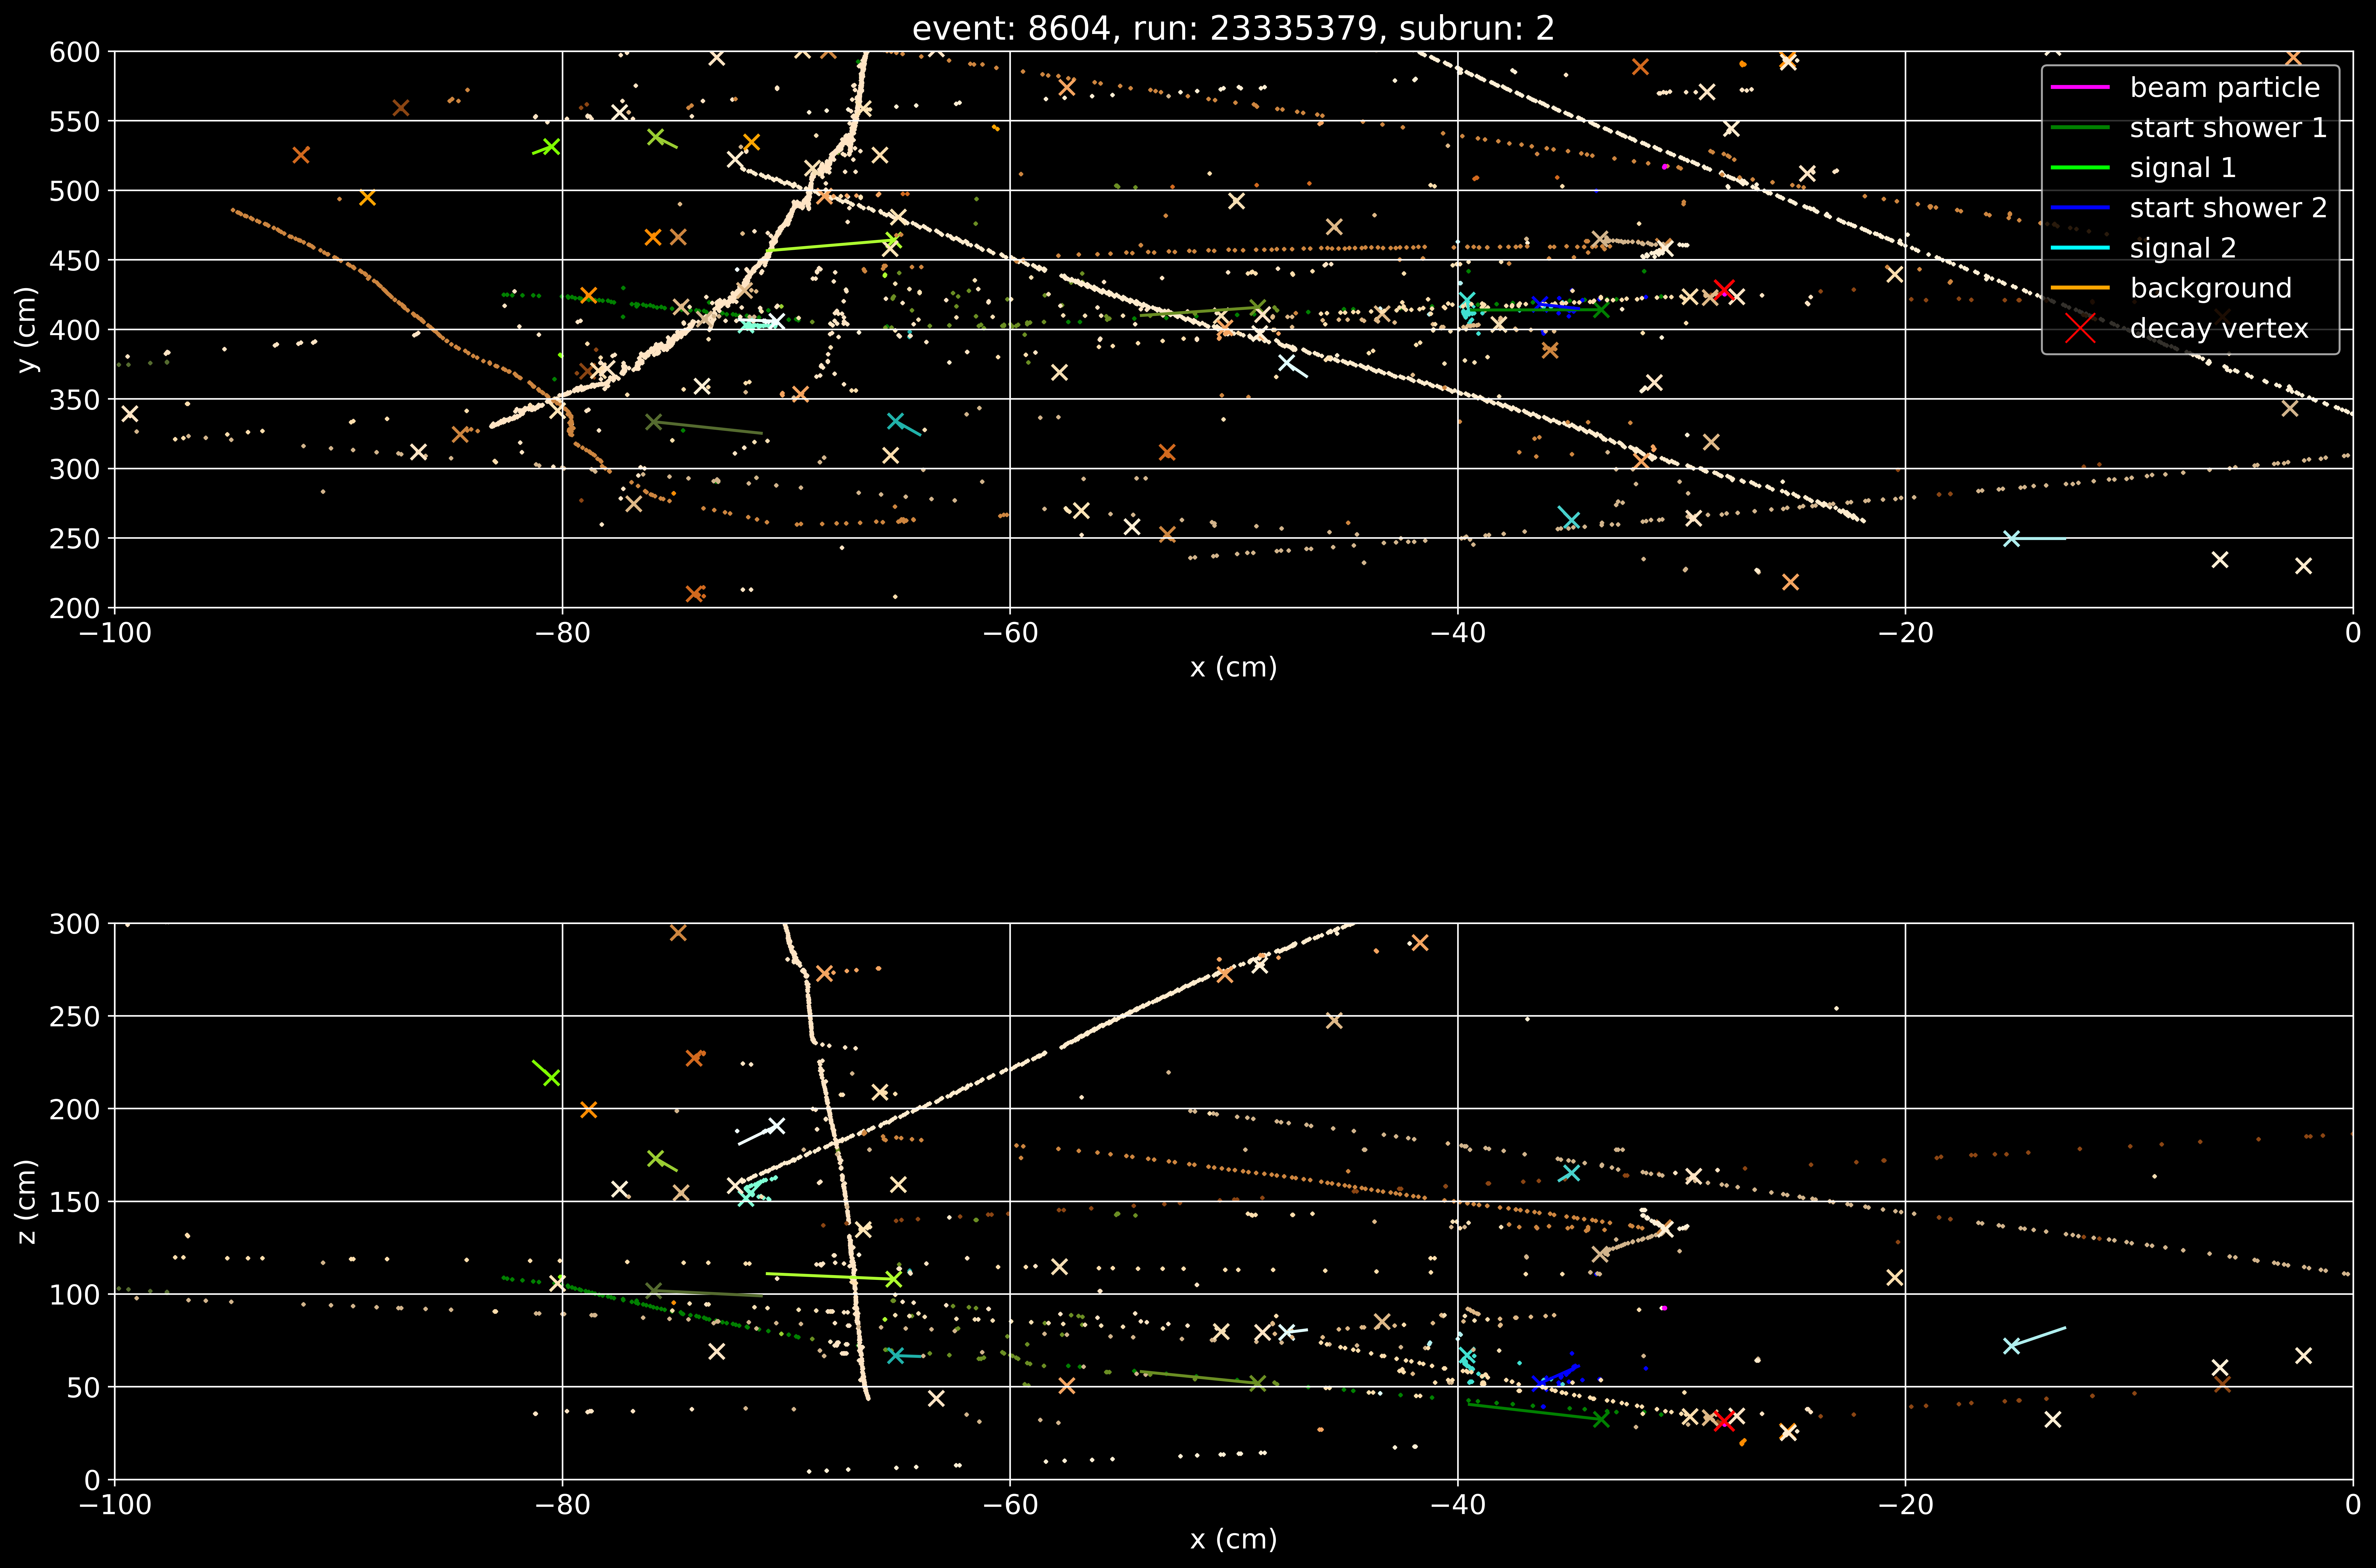

In [38]:
MakeEvd(4, (-100, 0), (200, 600), (0, 300))

Background PFOs close to the signal PFOs and one apprears to intersect a shower which may explain why it is broken into fragments

Number of signal PFOs for start shower 0: 9
Number of signal PFOs for start shower 1: 2


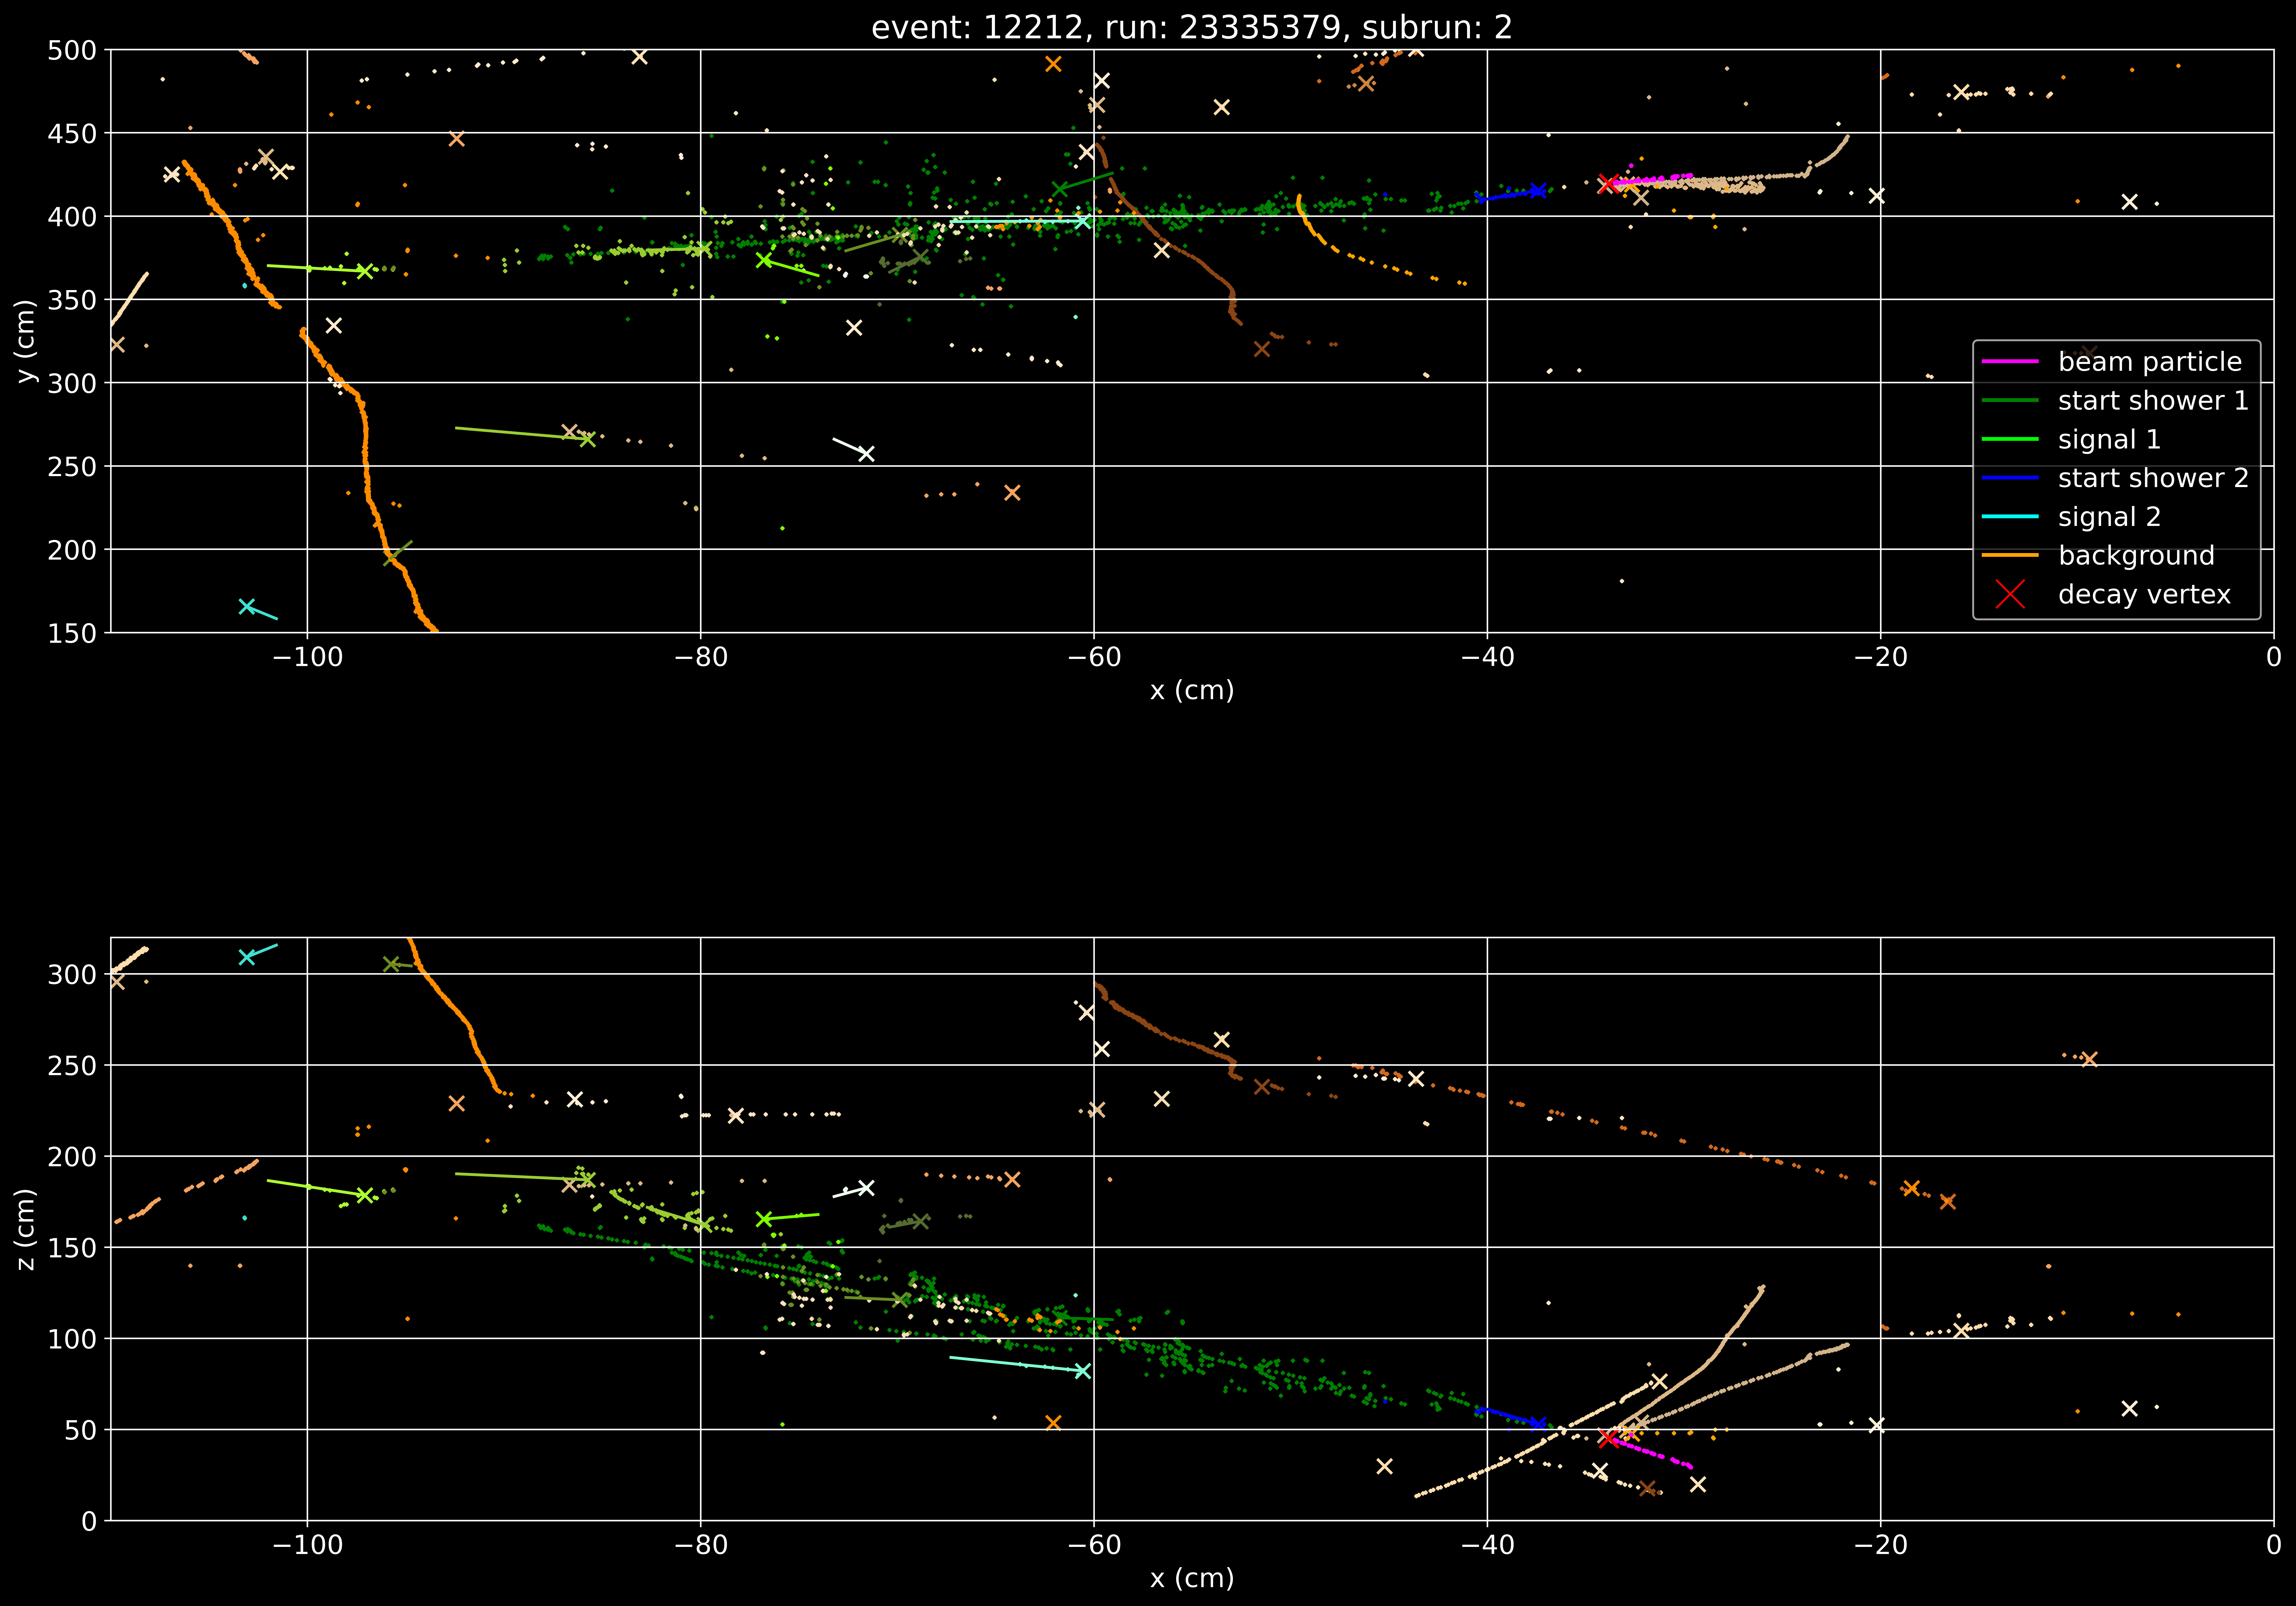

In [44]:
MakeEvd(5, (-110, 0), (150, 500), (0, 320))

Directions/start positions for start showers is completely wrong, same as 4, large shower breaks up in the end. Photons appear highly collimated and appears to be some merging misreconstruction occuring. End of shower crosses with a background PFO and those signal PFOs near this have tajectories similar to the background PFO (roughly).

Number of signal PFOs for start shower 0: 11
Number of signal PFOs for start shower 1: 3


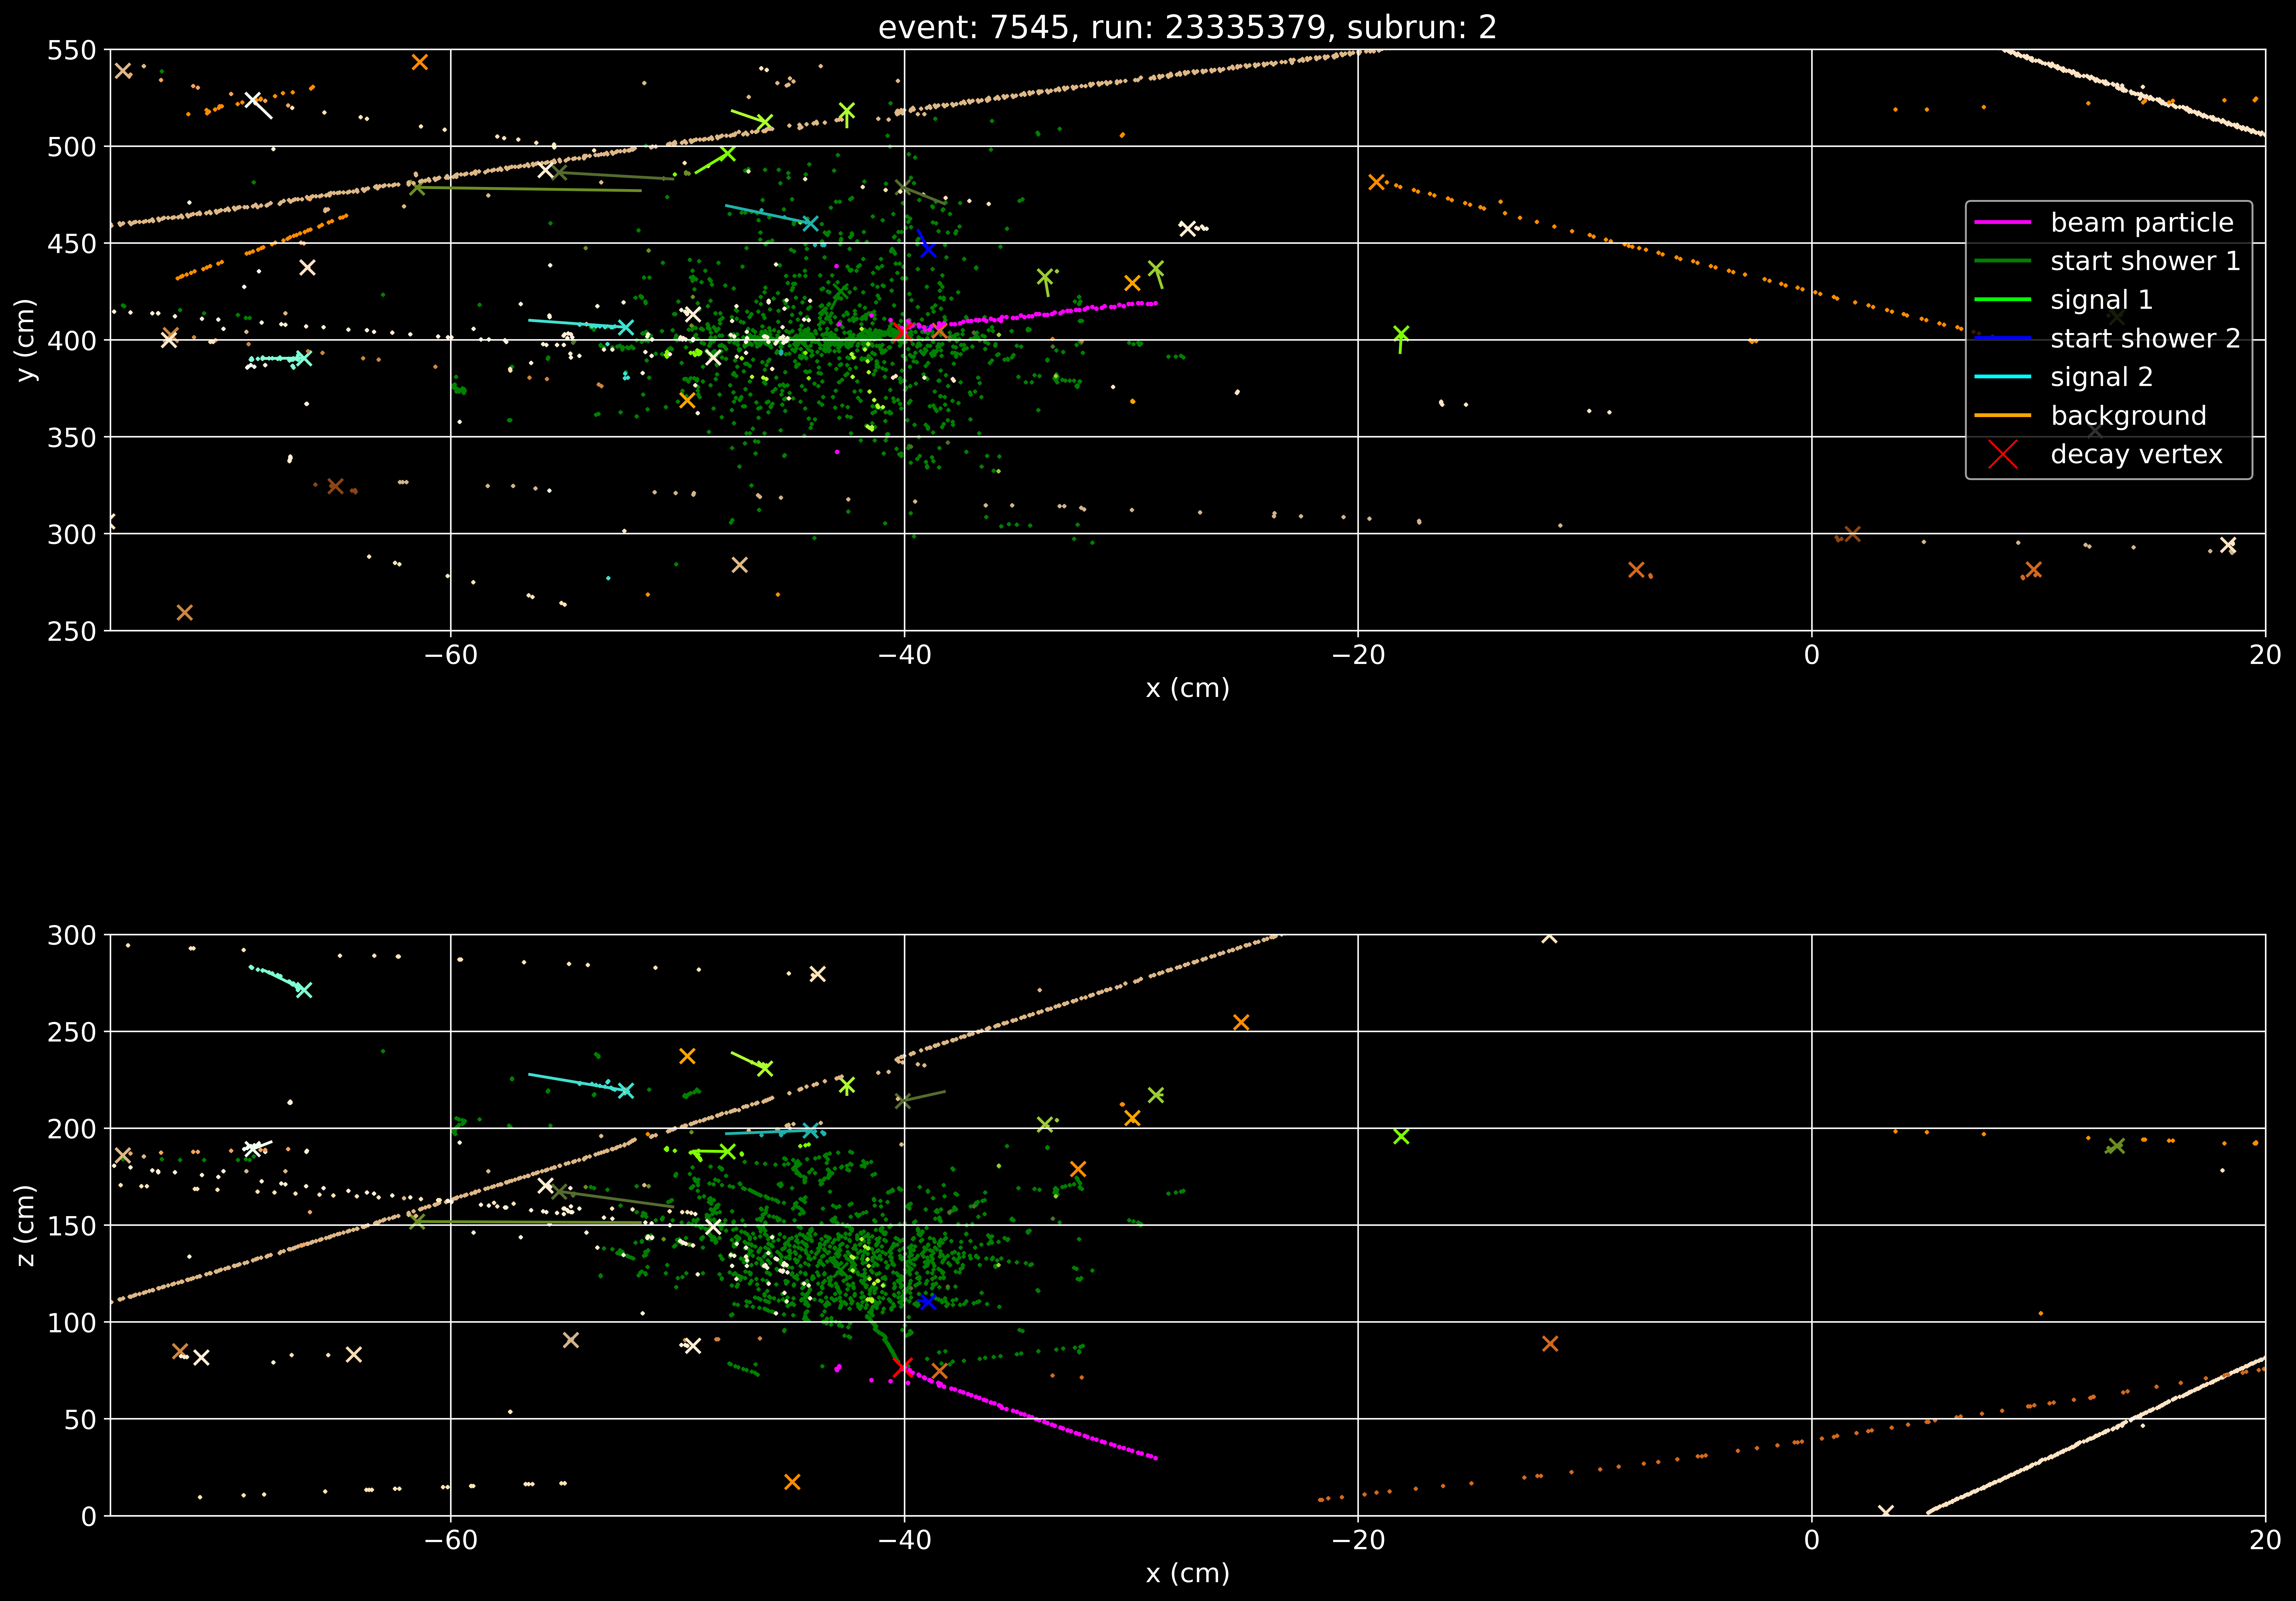

In [49]:
MakeEvd(7, (-75, 20), (250, 550), (0, 300))

Similar to 5.